# Parte1 - P1-Credit Card Fraud Detection- Analise_Exploratoria


### have the propose of understand the dataset extracted from:
https://www.kaggle.com/mishra5001/credit-card/code



In [1]:
# REFERENCES 

# treating the data, selecting the kind of type
#https://qastack.com.br/programming/22697773/how-to-check-the-dtype-of-a-column-in-python-pandas#:~:text=No%20caso%20de%2

# equivalência de SQL e PANDAS - promissor
# https://www.phylos.net/2021-01-30/pandas-e-sql-comparados/

#https://insightlab.ufc.br/10-funcoes-mais-usadas-para-manipular-dataframes-no-pandas/

# PCA
#https://www.kindsonthegenius.com/principal-components-analysispca-in-python-step-by-step/
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

<a name="indice"> </a>
* # [**`Indice`**](#indice)
* ### [**`1 - Loading Data`**](#a1)
* ### [**`2 - Data cleaning`**](#a2)
* ### [**`2.1 - Treating the values missing`**](#a3)
* ### [**`2.2 - Changing the dara object to data category`**](#a4)
* ### [**`2.3 - Verifying the types of the columns in dataset`**](#a5)
* ### [**`2.4 - Description of the remained columns`**](#a6)
* ### [**`3 - Data Exploratory`**](#a7)
* ### [**`3.0 - Inicial data exploring`**](#a8)
* ### [**`3.1 - Categorical Data`**](#a9)


In [3]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### <a name="a1"> **`1 Loading Data `**</a>

[Voltar ao índice](#indice)

In [4]:
# load the dataset with columns descriptions
#col_descr=pd.read_csv("archive(1)/columns_description.csv",encoding = "latin-1")

In [5]:
#displaying all the rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
# load the data of application_data
df_app=pd.read_csv("archive(1)/application_data.csv",encoding = "latin-1")

In [7]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
df_app.shape

(307511, 122)

In [9]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


* ###### AMT_INCOME_TOTAL mean = 1.687979e+05
* ######                 std  = 2.371231e+05
* ######                25% - 75 % [1.125000e+05 -  2.025000e+05] 
* ###### valores acima e abaixo e abaixo podem sererm considerados como outliers

* ###### AMT_CREDIT ( loan ) mean = 5.990260e+05
* ######                     std  = 4.024908e+05
* ######                25% - 75 % [2.700000e+05 -  8.086500e+05] 
* ###### valores acima e abaixo e abaixo podem sererm considerados como outliers

In [10]:
df_app.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### <a name="a2"> **`2 - Data cleaning`**</a>
[Voltar ao índice](#indice)

* ##### dropping the columns irrelevants

In [11]:
#dropping the columns that store the Normalized information about building where the client lives
MODE_cols = [col for col in df_app.columns if '_MODE' in col]
df_app.drop(columns = MODE_cols,inplace=True)
MEDI_cols = [col for col in df_app.columns if '_MEDI' in col]
df_app.drop(columns = MEDI_cols,inplace=True)
AVG_cols = [col for col in df_app.columns if '_AVG' in col]
df_app.drop(columns = AVG_cols,inplace=True)

In [12]:
#Find all the columns starting with name FLAG_DOCUMENT , as these are just FLAGS indicating document submission and can be dropped
temp=df_app.filter(regex='^FLAG_DOCUMENT',axis=1)
#drop the FLAG_DOCUMENT Columns the column names are stored in temp Series
df_app.drop(columns=temp.columns,inplace=True)

In [13]:
#These columns 'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL' 
#are FLAGS which need not be used in analysis so drop them
df_app.drop(columns=['FLAG_MOBIL',
                           'FLAG_EMP_PHONE',
                           'FLAG_WORK_PHONE',
                           'FLAG_CONT_MOBILE',
                           'FLAG_PHONE',
                            'FLAG_EMAIL'],inplace=True)

In [14]:
# Manteining the AMT_REQ_CREDIT_BUREAU_YEAR and excluing the other redundants columns
df_app.drop(columns=['AMT_REQ_CREDIT_BUREAU_DAY',
                           'AMT_REQ_CREDIT_BUREAU_HOUR',
                           'AMT_REQ_CREDIT_BUREAU_WEEK',
                           'AMT_REQ_CREDIT_BUREAU_MON',
                           'AMT_REQ_CREDIT_BUREAU_QRT'],inplace=True)  

In [15]:
# drop dados external source, because we do not have a clear description of these
df_app.drop(columns=['EXT_SOURCE_1',
                           'EXT_SOURCE_2',
                           'EXT_SOURCE_3'],inplace=True)

In [16]:
# if the person was or not accompanied probably is not relevant
df_app.drop(columns=['NAME_TYPE_SUITE'],inplace=True)

In [17]:
# dropping flags atualização de cadastro e de monitoramento de arredores sociais do client
df_app.drop(columns=['REG_REGION_NOT_LIVE_REGION',
                           'REG_REGION_NOT_WORK_REGION',
                           'LIVE_REGION_NOT_WORK_REGION',
                           'REG_CITY_NOT_LIVE_CITY',
                           'REG_CITY_NOT_WORK_CITY',
                           'LIVE_CITY_NOT_WORK_CITY',
                           'OBS_30_CNT_SOCIAL_CIRCLE',
                           'DEF_30_CNT_SOCIAL_CIRCLE',
                           'OBS_60_CNT_SOCIAL_CIRCLE',
                           'DEF_60_CNT_SOCIAL_CIRCLE',
                           'WEEKDAY_APPR_PROCESS_START',
                           'HOUR_APPR_PROCESS_START',
                           'REG_REGION_NOT_LIVE_REGION',
                           'DAYS_REGISTRATION',
                           'DAYS_ID_PUBLISH',
                           'DAYS_LAST_PHONE_CHANGE'],inplace=True) 


* ##### data to explore

In [18]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

* ##### percentage of data missing

In [19]:
p_miss_app=df_app.isna().sum().sort_values(ascending=False)/df_app.shape[0]*100 #
p_miss_app

OWN_CAR_AGE                    65.990810
OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
NAME_HOUSING_TYPE               0.000000
ORGANIZATION_TYPE               0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_POPULATION_RELATIVE      0.000000
SK_ID_CURR                      0.000000
NAME_FAMILY_STATUS              0.000000
TARGET                          0.000000
NAME_INCOME_TYPE                0.000000
AMT_CREDIT                      0.000000
AMT_INCOME_TOTAL                0.000000
CNT_CHILDREN                    0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TYPE              0.000000
NAME_EDUCATION_T

* ##### Seeing the classes and quantity of registers in OCCUPATION_TYPE

In [20]:
print(df_app.groupby("OCCUPATION_TYPE").size().sort_values(ascending=False))
print('\n sum OF non NaN',df_app.groupby("OCCUPATION_TYPE").size().sort_values(ascending=False).sum())

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
dtype: int64

 sum OF non NaN 211120


* ##### quantity of missing values in OCCUPATION_TYPE

In [21]:
# In your occupation type we have 96391 lines with missing values
df_app.groupby((df_app["OCCUPATION_TYPE"].isna())).size()#.sort_values(ascending=False)

# persentual NaN null ???
# 96391*100/211120 = 45.656972338006824

OCCUPATION_TYPE
False    211120
True      96391
dtype: int64

### <a name="a3"> **`2.1  Treating the values missing `**</a>
[Voltar ao índice](#indice)

* ##### INSERTING THE LABOR CLASS OTHERS IN PLACE WHERE NaN

In [22]:
df_app["OCCUPATION_TYPE"].fillna("OTHERS",inplace=True)

In [23]:
print(df_app.groupby("OCCUPATION_TYPE").size().sort_values(ascending=False))

OCCUPATION_TYPE
OTHERS                   96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
dtype: int64


* ##### data missing

In [24]:
p_miss_app=df_app.isna().sum().sort_values(ascending=False)#/df_app.shape[0]*100 #
p_miss_app

OWN_CAR_AGE                    202929
AMT_REQ_CREDIT_BUREAU_YEAR      41519
AMT_GOODS_PRICE                   278
AMT_ANNUITY                        12
CNT_FAM_MEMBERS                     2
NAME_HOUSING_TYPE                   0
ORGANIZATION_TYPE                   0
REGION_RATING_CLIENT_W_CITY         0
REGION_RATING_CLIENT                0
OCCUPATION_TYPE                     0
DAYS_EMPLOYED                       0
DAYS_BIRTH                          0
REGION_POPULATION_RELATIVE          0
SK_ID_CURR                          0
NAME_FAMILY_STATUS                  0
TARGET                              0
NAME_INCOME_TYPE                    0
AMT_CREDIT                          0
AMT_INCOME_TOTAL                    0
CNT_CHILDREN                        0
FLAG_OWN_REALTY                     0
FLAG_OWN_CAR                        0
CODE_GENDER                         0
NAME_CONTRACT_TYPE                  0
NAME_EDUCATION_TYPE                 0
dtype: int64

* ###### treating the values missing 
* ###### os missing values was substituded the median value instead the media 
* ###### because this value have less influency of outliers

In [25]:
c_age=df_app['OWN_CAR_AGE'].median()
df_app['OWN_CAR_AGE'].fillna(c_age,inplace=True)

x=df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(x,inplace=True)

x=df_app['CNT_FAM_MEMBERS'].median()
df_app['CNT_FAM_MEMBERS'].fillna(x,inplace=True)

x=df_app['AMT_ANNUITY'].median()
df_app['AMT_ANNUITY'].fillna(x,inplace=True)

x=df_app['AMT_GOODS_PRICE'].median()
df_app['AMT_GOODS_PRICE'].fillna(x,inplace=True)

print(df_app.shape)
df_app.isna().sum().sort_values(ascending=False)/df_app.shape[0]*100 


(307511, 25)


SK_ID_CURR                     0.0
NAME_FAMILY_STATUS             0.0
ORGANIZATION_TYPE              0.0
REGION_RATING_CLIENT_W_CITY    0.0
REGION_RATING_CLIENT           0.0
CNT_FAM_MEMBERS                0.0
OCCUPATION_TYPE                0.0
OWN_CAR_AGE                    0.0
DAYS_EMPLOYED                  0.0
DAYS_BIRTH                     0.0
REGION_POPULATION_RELATIVE     0.0
NAME_HOUSING_TYPE              0.0
NAME_EDUCATION_TYPE            0.0
TARGET                         0.0
NAME_INCOME_TYPE               0.0
AMT_GOODS_PRICE                0.0
AMT_ANNUITY                    0.0
AMT_CREDIT                     0.0
AMT_INCOME_TOTAL               0.0
CNT_CHILDREN                   0.0
FLAG_OWN_REALTY                0.0
FLAG_OWN_CAR                   0.0
CODE_GENDER                    0.0
NAME_CONTRACT_TYPE             0.0
AMT_REQ_CREDIT_BUREAU_YEAR     0.0
dtype: float64

In [26]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,9.0,Laborers,1.0,2,2,Business Entity Type 3,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,9.0,Core staff,2.0,1,1,School,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,26.0,Laborers,1.0,2,2,Government,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,9.0,Laborers,2.0,2,2,Business Entity Type 3,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,9.0,Core staff,1.0,2,2,Religion,0.0


### <a name="a4"> **`2.2 Changing the dara object to data category `**</a>
[Voltar ao índice](#indice)

In [27]:
#Identification if loan is cash or revolving
df_app['NAME_CONTRACT_TYPE']=df_app['NAME_CONTRACT_TYPE'].astype('category')

df_app['CODE_GENDER']=df_app['CODE_GENDER'].astype('category')

df_app['FLAG_OWN_CAR']=df_app['FLAG_OWN_CAR'].astype('category')

#Flag if client owns a house or flat
df_app['FLAG_OWN_REALTY']=df_app['FLAG_OWN_REALTY'].astype('category')

#Clients income type (businessman, working, maternity leave,…)
df_app['NAME_INCOME_TYPE']=df_app['NAME_INCOME_TYPE'].astype('category')

#Level of highest education the client achieved
df_app['NAME_EDUCATION_TYPE']=df_app['NAME_EDUCATION_TYPE'].astype('category')

#Family status of the client
df_app['NAME_FAMILY_STATUS']=df_app['NAME_FAMILY_STATUS'].astype('category')

#What is the housing situation of the client (renting, living with parents, ...)
df_app['NAME_HOUSING_TYPE']=df_app['NAME_HOUSING_TYPE'].astype('category')

# #Type of organization where client works
# ORGANIZATION_TYPE
df_app['ORGANIZATION_TYPE']=df_app['ORGANIZATION_TYPE'].astype('category')

#What kind of occupation does the client have
df_app['OCCUPATION_TYPE']=df_app['OCCUPATION_TYPE'].astype('category')

* ##### Converting the negative values to positive values

In [28]:
df_app['DAYS_BIRTH'] = abs(df_app['DAYS_BIRTH'])
df_app['DAYS_EMPLOYED'] = abs(df_app['DAYS_EMPLOYED'])


In [29]:
# treating the data, selecting the kind of type
#https://qastack.com.br/programming/22697773/how-to-check-the-dtype-of-a-column-in-python-pandas#:~:text=No%20caso%20de%20bool%2C%20podemos,period')%20ser%C3%A1%20gerado%20NotImplementedError%20.
df_app.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,9.0,Laborers,1.0,2,2,Business Entity Type 3,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,9.0,Core staff,2.0,1,1,School,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,26.0,Laborers,1.0,2,2,Government,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9.0,Laborers,2.0,2,2,Business Entity Type 3,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,9.0,Core staff,1.0,2,2,Religion,0.0


In [ ]:
# print(df_app.groupby("ORGANIZATION_TYPE").size().sort_values(ascending=False))

### <a name="a5"> **`2.3 Verifying the types of the columns in dataset `**</a>
[Voltar ao índice](#indice)

In [30]:
df_app.select_dtypes('category').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

In [31]:
df_app.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [32]:
df_app.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
      dtype='object')


### <a name="a6"> **`2.4 Description of the remained columnst `**</a>
[Voltar ao índice](#indice)

* #### 0   SK_ID_CURR   -  int64   
ID of loan in our sample
* #### 1   TARGET -  int64   
Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
* ####  2   NAME_CONTRACT_TYPE           210191 non-null  category
Identification if loan is cash or revolving
* ####  3   CODE_GENDER   category
Gender of the client
* ####  4   FLAG_OWN_CAR  category
Flag if the client owns a car
* ####  5   FLAG_OWN_REALTY category
Flag if client owns a house or flat
* ####  6   CNT_CHILDREN  int64   
Number of children the client has
* ####  7   AMT_INCOME_TOTAL float64 
Income of the client
* ####  8   AMT_CREDIT float64 
Credit amount of the loan
* ####  9   AMT_ANNUITY float64 
Loan annuity
* ####  10  AMT_GOODS_PRICE float64 
For consumer loans it is the price of the goods for which the loan is given
* ####  11  NAME_INCOME_TYPE  category
Clients income type (businessman, working, maternity leave,…)
* ####  12  NAME_EDUCATION_TYPE category
Level of highest education the client achieved
* ####  13  NAME_FAMILY_STATUS  category
Family status of the client
* ####  14  NAME_HOUSING_TYPE   category
What is the housing situation of the client (renting, living with parents, ...)
* ####  15  REGION_POPULATION_RELATIVE float64 
Normalized population of region where client lives (higher number means the client lives in more populated region)
* ####  16  DAYS_BIRTH int64 
Client's age in days at the time of application
* ####  17  DAYS_EMPLOYED int64   
How many days before the application the person started current employment
* ####  18  OWN_CAR_AGE   float64 
Age of client's car
* ####  19  OCCUPATION_TYPE category
What kind of occupation does the client have
* ####  20  CNT_FAM_MEMBERS  float64 
How many family members does client have
* ####  21  REGION_RATING_CLIENT int64   
Our rating of the region where client lives (1,2,3) the meaning of 1,2,3?
Classificação da região que o cliente vive
* ####  22  REGION_RATING_CLIENT_W_CITY int64 
Our rating of the region where client lives with taking city into account (1,2,3)
classificação da regiao que o cliente vive levando 
em consideração a sua cidade
* ####  23  ORGANIZATION_TYPE category
Type of organization where client works
* #### 24 AMT_REQ_CREDIT_BUREAU_YEAR   float64
Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)

### <a name="a7"> **`3 Data Exploratory `**</a>
[Voltar ao índice](#indice)

### <a name="a8"> **`3.0 Inicial data exploring `**</a>
[Voltar ao índice](#indice)

In [33]:
#Checking the percentage of target variable
pay_diff=df_app[df_app.TARGET==1]
pay=df_app[df_app.TARGET==0]

In [34]:
# % withh dificult in pay
a=pay_diff['TARGET'].sum()/df_app['TARGET'].shape[0]*100
print('% with dificult in pay =', a)

% with dificult in pay = 8.072881945686495


In [35]:
# % who didn't had problem in pay
a=len(pay['TARGET'])/df_app['TARGET'].shape[0]*100
print('% without dificult in pay =', a)
# sum of 0 was 0

% without dificult in pay = 91.92711805431351


In [36]:
# analysing correlations
s=df_app.corr()
s

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000431,-0.000258,0.000849,0.001500,0.001369,0.001285,-0.002895,-0.001075,-0.001138,0.004071
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012815,-0.039623,-0.037227,-0.078239,-0.047046,0.015982,0.009308,0.058899,0.060893,0.012161
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021377,-0.001856,-0.025573,-0.330938,-0.241583,0.026034,0.879160,0.025423,0.024781,-0.034874
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159632,0.074796,-0.027261,-0.063835,-0.022694,0.016341,-0.085465,-0.091735,0.015821
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770127,0.986734,0.099738,0.055436,-0.064319,-0.034298,0.063160,-0.101776,-0.110915,-0.036634
AMT_ANNUITY,-0.000431,-0.012815,0.021377,0.191657,0.770127,1.000000,0.774837,0.118418,-0.009443,-0.102848,-0.031126,0.075541,-0.128516,-0.141674,-0.008286
AMT_GOODS_PRICE,-0.000258,-0.039623,-0.001856,0.159632,0.986734,0.774837,1.000000,0.103519,0.053510,-0.062190,-0.039778,0.061138,-0.103759,-0.112185,-0.038979
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118418,0.103519,1.000000,0.029582,-0.004094,-0.039282,-0.024209,-0.532877,-0.531535,-0.000085
DAYS_BIRTH,0.001500,-0.078239,-0.330938,-0.027261,0.055436,-0.009443,0.053510,0.029582,1.000000,0.623941,-0.029456,-0.278892,-0.009361,-0.008073,0.072990
DAYS_EMPLOYED,0.001369,-0.047046,-0.241583,-0.063835,-0.064319,-0.102848,-0.062190,-0.004094,0.623941,1.000000,-0.019393,-0.234364,0.033046,0.034880,0.045079


In [37]:
# s['TARGET'].sort_values(ascending=False)
s['AMT_INCOME_TOTAL'].sort_values(ascending=False) # CNT_CHILDREN

# as higher the amount income total of the client higher the
# The Annuit will be higher, AMT_GOODS_PRICE, AMT_CREDIT

AMT_INCOME_TOTAL               1.000000
AMT_ANNUITY                    0.191657
AMT_GOODS_PRICE                0.159632
AMT_CREDIT                     0.156870
REGION_POPULATION_RELATIVE     0.074796
CNT_FAM_MEMBERS                0.016341
AMT_REQ_CREDIT_BUREAU_YEAR     0.015821
CNT_CHILDREN                   0.012882
SK_ID_CURR                    -0.001820
TARGET                        -0.003982
OWN_CAR_AGE                   -0.022694
DAYS_BIRTH                    -0.027261
DAYS_EMPLOYED                 -0.063835
REGION_RATING_CLIENT          -0.085465
REGION_RATING_CLIENT_W_CITY   -0.091735
Name: AMT_INCOME_TOTAL, dtype: float64

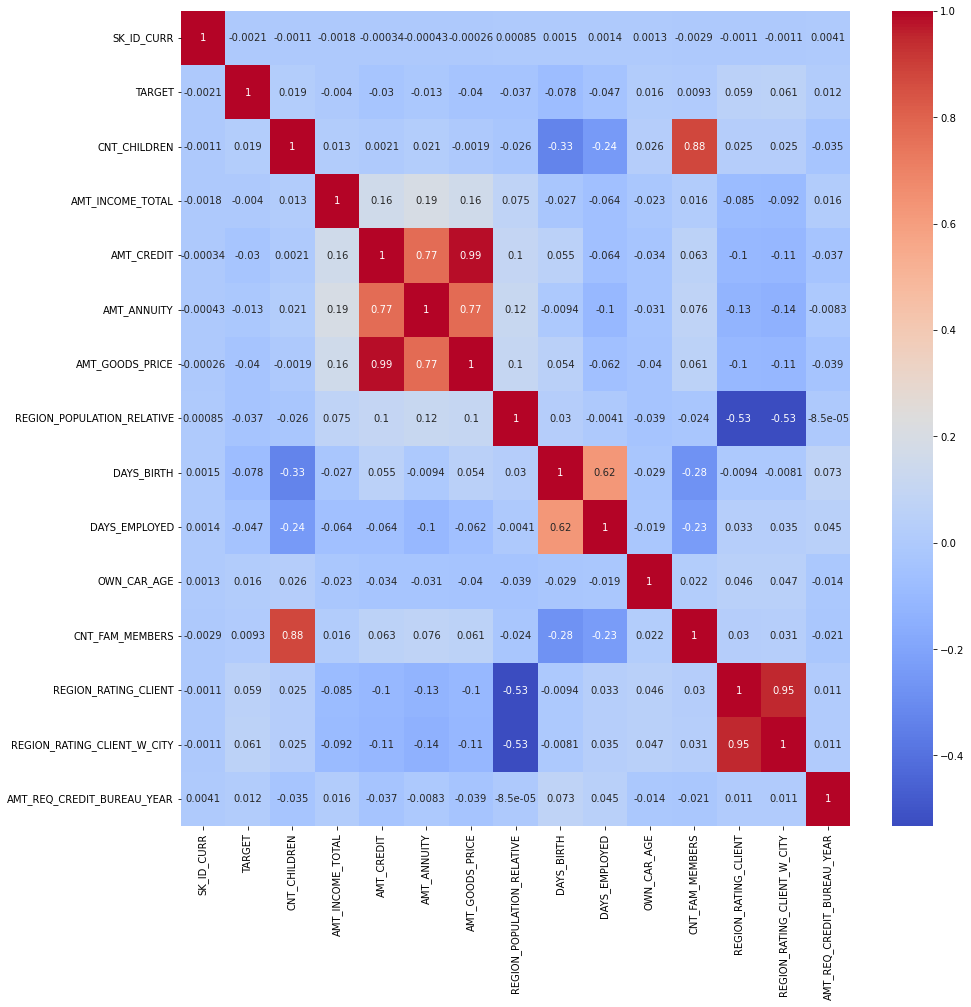

In [38]:
plt.figure(figsize=(15,15))

# heatmap
sns.heatmap(s, cmap="coolwarm", annot=True)
plt.show()

# varibles with high correlation
# AMT_CREDIT X AMT_GOODS_PRICE = 0.99
# AMT_CREDIT X AMT_ANNUIT = 0.77
# CNT_CHILDREN X CNT_FAM_MEMBERS  0.88
# DAYS_BIRTH X DAYS_EMPLOYED = 0.62
# REGION_RATING_CLIENT X REGION_RATING_CLIENT_W_CITY = 0.95

### <a name="a9"> **`3.1 categorical Data `**</a>
[Voltar ao índice](#indice)

Text(0.5, 1.0, 'TARGET per GENDER')

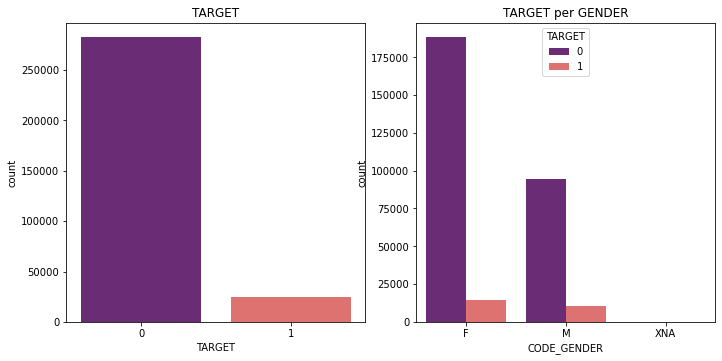

In [39]:
fig, ax =plt.subplots(1,2,figsize=(10,5))
plt.tight_layout(2)

#/df_app.shape[0]*100
sns.countplot(df_app['TARGET'], palette='magma',ax=ax[0]).set_title('TARGET')
sns.countplot(df_app['CODE_GENDER'], hue=df_app.TARGET, palette='magma',ax=ax[1]).set_title('TARGET per GENDER')

# Acording with the dictionary we have a TARGET where  
# 1- the client have the dificult to pay
# 0- the client don't have dificult to pay

# it is noticed that the target is highly unbalanced
# women borrow more
# but in proportion to the difficulty in performing the pattern similar to the men's difficulty

## make some code of agreggations and generat tables?

Text(0.5, 1.0, 'TARGET per EDUCATION_TYPE')

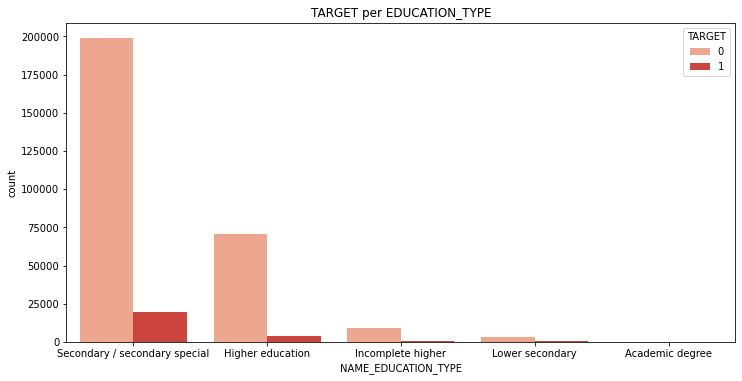

In [40]:
# 
fig, ax =plt.subplots(1,1,figsize=(10,5))
plt.tight_layout(1)
sns.countplot(df_app['NAME_EDUCATION_TYPE'], hue=df_app.TARGET, palette='Reds',order=['Secondary / secondary special','Higher education','Incomplete higher','Lower secondary','Academic degree']).set_title('TARGET per EDUCATION_TYPE')

# Sequency of loans category
# 1º -secondary / secondary especial - EDUCATUION
# 2º -HIGHER
# 3º -Incomplete Higher
# 4º -Lower Secondary

* ##### In the follow we have the segmentation of the amount of loan credit per occupation type
* ##### those kind of segmentation will be helpfull for the sector analisys earn a lot of business insights

* ##### for example looking in target 1 who do not have conditions in make a payment
* ##### can been saw that, the number of loans, mean, standard deviation per occupation 
* ##### of the amount of credit gaven

In [41]:
df_app.groupby(["TARGET","OCCUPATION_TYPE",]).agg({"AMT_CREDIT": [np.size, np.mean,np.std]})#.sort_values(ascending=False)


AMT_CREDIT                              
                                   size           mean            std
TARGET OCCUPATION_TYPE                                               
0      Accountants                 9339  712090.022004  460242.920355
       Cleaning staff              4206  514652.036020  334135.079026
       Cooking staff               5325  543520.113803  350973.239587
       Core staff                 25832  628181.562577  428393.884568
       Drivers                    16496  618680.601358  392343.793205
       HR staff                     527  686600.632827  456742.703940
       High skill tech staff      10679  645990.890533  425387.902504
       IT staff                     492  649925.560976  475642.369555
       Laborers                   49348  575075.338636  379819.404306
       Low-skill Laborers          1734  463469.683391  306091.375866
       Managers                   20043  779793.269196  483360.248240
       Medicine staff              7965  611680.318079  401087.431553
       OTHERS                     90113  575319.772214  397052.578019
       Private service staff       2477  632254.708922  409671.843683
       Realty agents                692  659778.574422  417770.382182
       Sales staff                29010  565606.116236  374410.405407
       Secretaries                 1213  594313.983512  392862.596335
       Security staff              5999  561534.329555  371583.877735
       Waiters/barmen staff        1196  493256.671405  342288.495578
1      Accountants                  474  663798.370253  391196.497867
       Cleaning staff               447  476230.057047  279701.134968
       Cooking staff                621  501909.623188  300154.850085
       Core staff                  1738  581251.756329  365595.628196
       Drivers                     2107  562645.289986  327221.107295
       HR staff                      36  661307.000000  546379.228940
       High skill tech staff        701  596004.297432  382154.312304
       IT staff                      34  613913.691176  459902.731219
       Laborers                    5838  532940.543679  325001.875159
       Low-skill Laborers           359  434290.688022  250628.768352
       Managers                    1328  704124.565889  424026.737926
       Medicine staff               572  548255.556818  332752.367492
       OTHERS                      6278  560118.926569  349342.818061
       Private service staff        175  608156.280000  395357.295169
       Realty agents                 59  602461.677966  324831.321266
       Sales staff                 3092  541232.432406  335193.135341
       Secretaries                   92  583057.369565  376262.837998
       Security staff               722  520072.310942  313127.995547
       Waiters/barmen staff         152  477251.792763  303387.168568

Text(0.5, 1.0, 'TARGET per OCCUPATION_TYPE 5 2º')

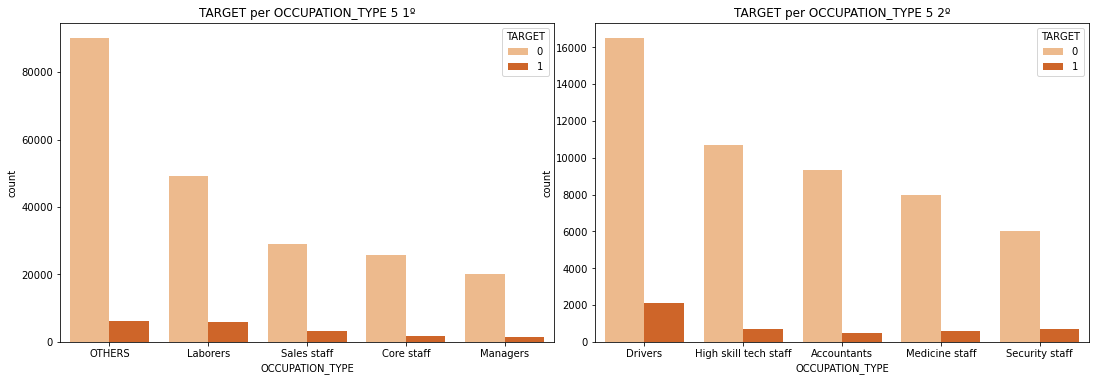

In [42]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
plt.tight_layout(1)
sns.countplot(df_app['OCCUPATION_TYPE'], hue=df_app.TARGET, palette='Oranges',order=['OTHERS','Laborers','Sales staff','Core staff','Managers'],ax=ax[0]).set_title('TARGET per OCCUPATION_TYPE 5 1º')
sns.countplot(df_app['OCCUPATION_TYPE'], hue=df_app.TARGET, palette='Oranges',order=['Drivers','High skill tech staff','Accountants','Medicine staff','Security staff'],ax=ax[1]).set_title('TARGET per OCCUPATION_TYPE 5 2º')


Text(0.5, 1.0, 'TARGET per OCCUPATION_TYPE 4 4º')

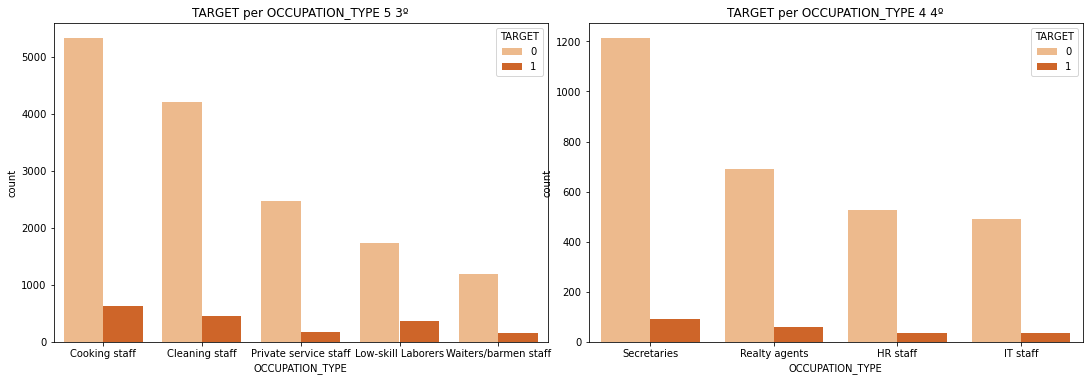

In [43]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
plt.tight_layout(1)

sns.countplot(df_app['OCCUPATION_TYPE'], hue=df_app.TARGET, palette='Oranges',order=['Cooking staff','Cleaning staff','Private service staff','Low-skill Laborers','Waiters/barmen staff'],ax=ax[0]).set_title('TARGET per OCCUPATION_TYPE 5 3º')
sns.countplot(df_app['OCCUPATION_TYPE'], hue=df_app.TARGET, palette='Oranges',order=['Secretaries','Realty agents','HR staff','IT staff'],ax=ax[1]).set_title('TARGET per OCCUPATION_TYPE 4 4º')


Text(0.5, 1.0, 'TARGET per FLAG_OWN_CAR')

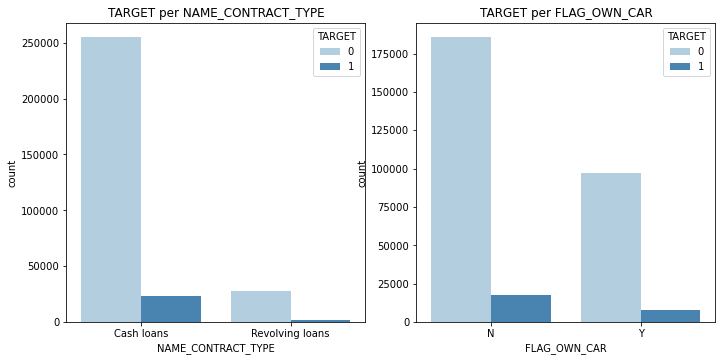

In [44]:
fig, ax =plt.subplots(1,2,figsize=(10,5))
plt.tight_layout(2)

sns.countplot(df_app['NAME_CONTRACT_TYPE'], hue=df_app.TARGET, palette='Blues',ax=ax[0]).set_title('TARGET per NAME_CONTRACT_TYPE')
sns.countplot(df_app['FLAG_OWN_CAR'], hue=df_app.TARGET, palette='Blues',ax=ax[1]).set_title('TARGET per FLAG_OWN_CAR')

# we can find of the great of amount was in cash 
# the totalyties of the loans in cash with dificult in pay -1  
#   was quite the same the amount taken and payed in the revolving loans

# Who have not a car had more dificult in pay, and more necessity taken a loan 


In [ ]:
# fig, ax =plt.subplots(1,2,figsize=(10,5))
# plt.tight_layout(2)

# sns.countplot(df_app[''], hue=df_app.TARGET, palette='Oranges',ax=ax[0]).set_title('TARGET per NAME_INCOME_TYPE')
# sns.countplot(df_app[''], hue=df_app.TARGET, palette='Oranges',ax=ax[1]).set_title('TARGET per ORGANIZATION_TYPE')

Text(0.5, 1.0, 'TARGET per NAME_INCOME_TYPE')

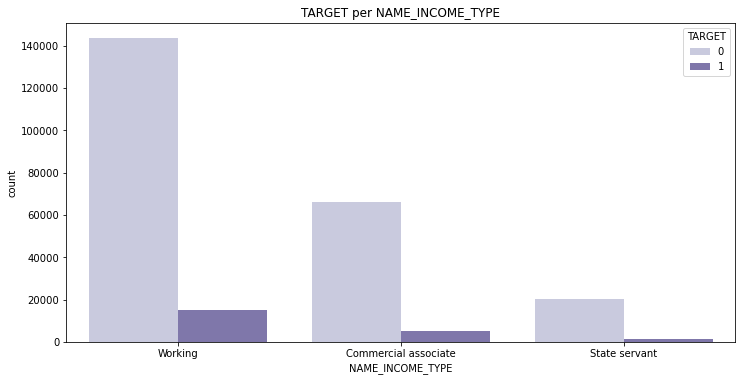

In [45]:
fig, ax =plt.subplots(1,1,figsize=(10,5))
plt.tight_layout(1)
sns.countplot(df_app['NAME_INCOME_TYPE'], hue=df_app.TARGET, palette='Purples', order=['Working','Commercial associate','State servant']).set_title('TARGET per NAME_INCOME_TYPE')

# Sequency of loans category
# 1º -Working
# 2º -Commercial associate
# 3º -State servant

Text(0.5, 1.0, 'TARGET per NAME_FAMILY_STATUS')

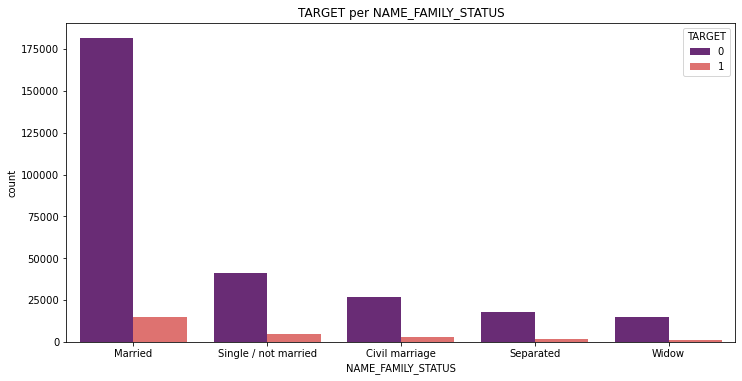

In [46]:
fig, ax =plt.subplots(1,1,figsize=(10,5))
plt.tight_layout(1)
sns.countplot(df_app['NAME_FAMILY_STATUS'], hue=df_app.TARGET, palette='magma',order=['Married','Single / not married','Civil marriage','Separated','Widow']).set_title('TARGET per NAME_FAMILY_STATUS')

# Sequency of loans category
# 1º -Married
# 2º -Single / not Married
# 3º -Civil marriage
# 4º -Separeted
# 5º -Widow

# 

Text(0.5, 1.0, 'TARGET per CNT_CHILDREN')

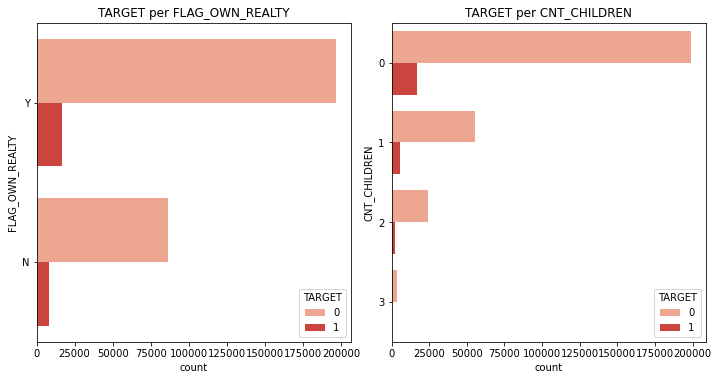

In [47]:
fig, ax =plt.subplots(1,2,figsize=(10,5))
plt.tight_layout(1)
sns.countplot(y=df_app['FLAG_OWN_REALTY'], hue=df_app.TARGET, palette='Reds',ax=ax[0], order=['Y', 'N']).set_title('TARGET per FLAG_OWN_REALTY')
sns.countplot(y=df_app['CNT_CHILDREN'], hue=df_app.TARGET, palette='Reds',ax=ax[1], order=[0,1,2,3]).set_title('TARGET per CNT_CHILDREN')

#FLAG_OWN_REALTY
#Flag if client owns a house or flat
# the client who have their own flat-house recieve more loans instead who do not have

# Another curioty thing is: the great quantity of loans was offered to who do not have children

In [ ]:
# df_app['CNT_CHILDREN'].unique().sum()

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

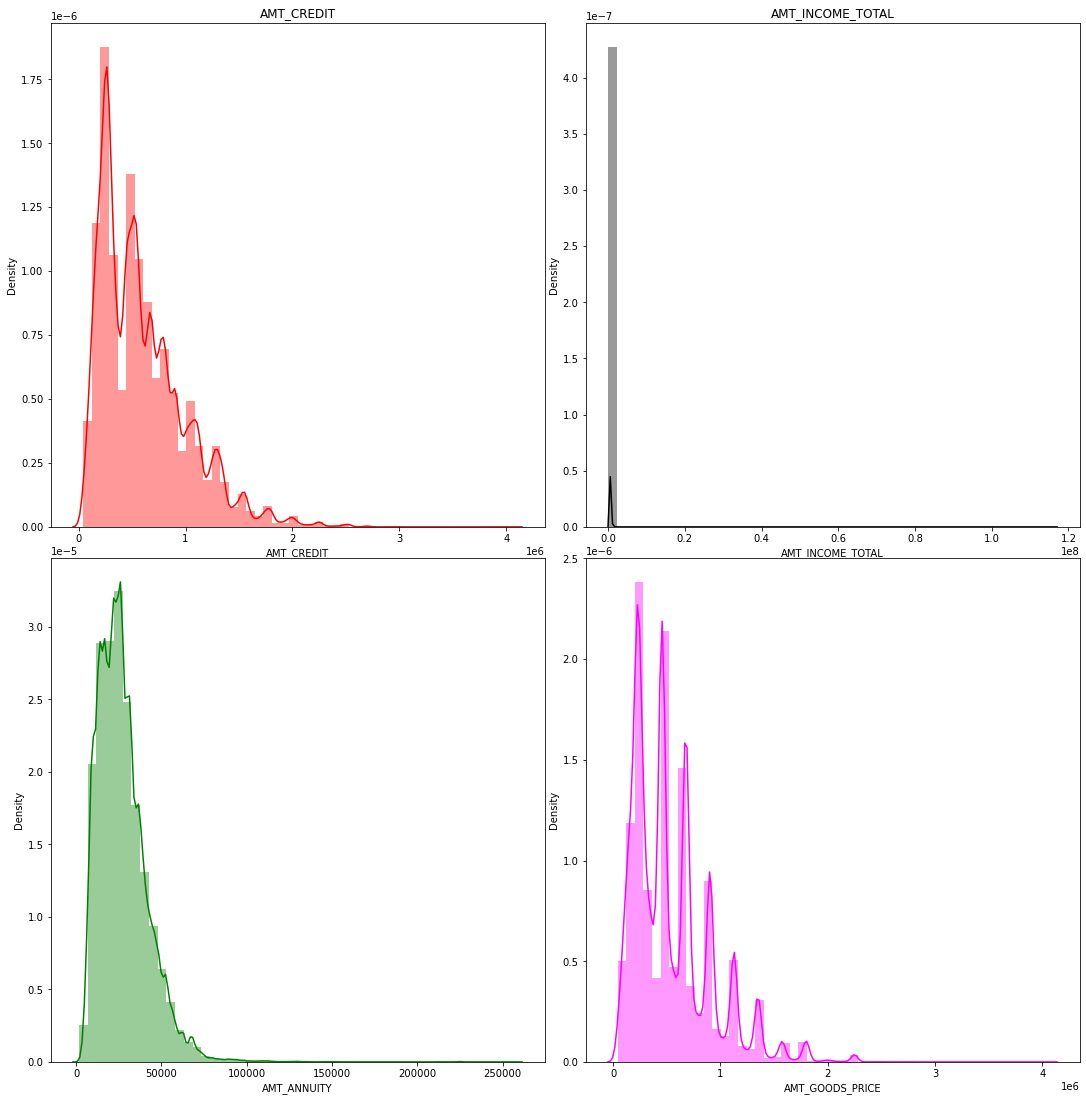

In [48]:
# AMT_CREDIT  x CNT_CHILDREN
fig, ax =plt.subplots(2,2,figsize=(15,15))
plt.tight_layout(1)
#df_app[['AMT_CREDIT']].hist(bins=60,alpha=0.5,color='Green')#.set_title('TARGET per NAME_FAMILY_STATUS')

#/df_app.shape[0]*100
sns.distplot(df_app['AMT_CREDIT'],ax=ax[0,0],color='red').set_title('AMT_CREDIT')
sns.distplot(df_app['AMT_INCOME_TOTAL'],ax=ax[0,1],color='black').set_title('AMT_INCOME_TOTAL')
sns.distplot(df_app['AMT_ANNUITY'],ax=ax[1,0],color='green')#.set_title('AMT_ANNUITY')
sns.distplot(df_app['AMT_GOODS_PRICE'],ax=ax[1,1],color='magenta')#.set_title('AMT_GOODS_PRICE')
# The distribuition of  Credit amount of the loan
# is about 20 000

In [ ]:
#df_app[['AMT_INCOME_TOTAL']].hist(bins=150,alpha=0.5,color='Green')#.set_title('TARGET per NAME_FAMILY_STATUS')

In [ ]:
#df_app['AMT_INCOME_TOTAL'].sort()

In [ ]:
#df_app.info()

In [ ]:
# %matplotlib inline
# sns.lmplot(y="AMT_CREDIT",
#            x="AMT_INCOME_TOTAL", 
#            #hue="TARGET", 
#            col="TARGET", 
#            palette="Set1",
#            data=df_app, 
#            #scatter_kws={'s': 90, 'alpha': 0.5},
#            #line_kws={'lw': 4}
#           );

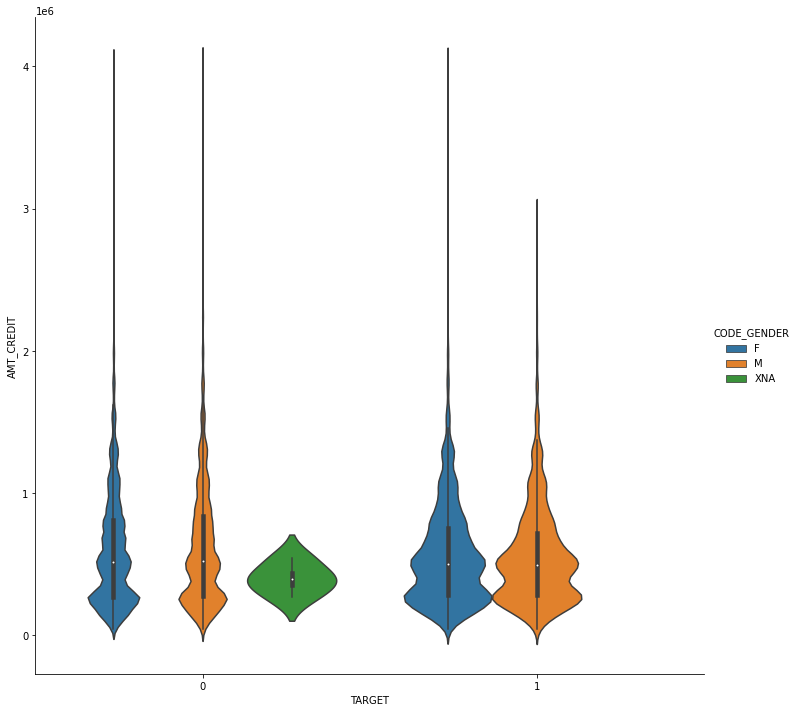

In [49]:
# fig, ax =plt.subplots(1,1,figsize=(15,15))
#plt.tight_layout(1)

sns.catplot(y="AMT_CREDIT", x="TARGET",hue="CODE_GENDER" , kind="violin", data=df_app,height=10)#,split=True

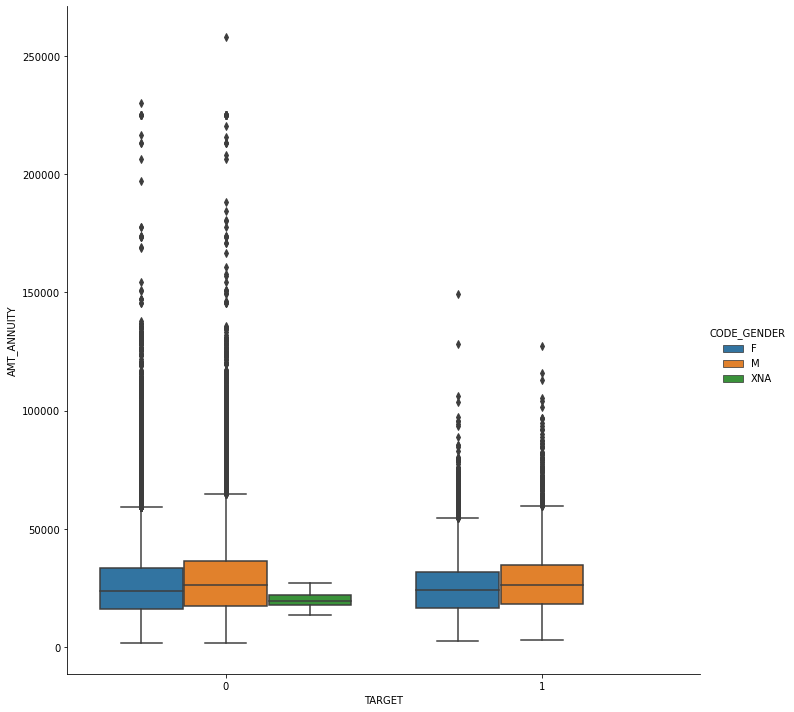

In [50]:
sns.catplot(y="AMT_ANNUITY", x="TARGET",hue="CODE_GENDER" , kind="box", data=df_app,height=10)
# with the boxplot can been saw the outliers points

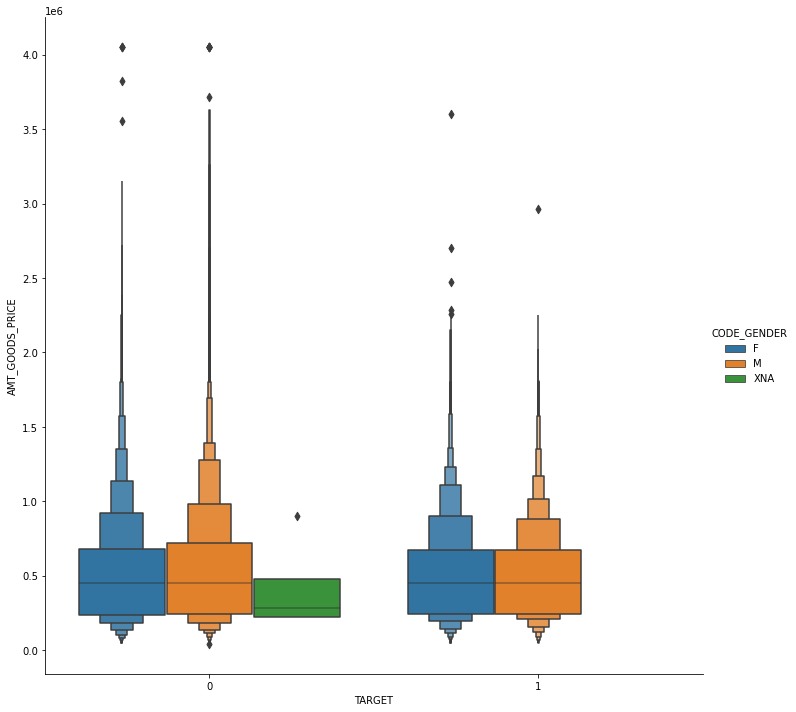

In [51]:
sns.catplot(y="AMT_GOODS_PRICE", x="TARGET",hue="CODE_GENDER" , kind="boxen", data=df_app,height=10)

# 4 PCA (Principal Component Analisys)
https://www.kindsonthegenius.com/principal-components-analysispca-in-python-step-by-step/

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

http://www.ic.uff.br/~aconci/PCA-ACP.pdf

In [52]:
# 1 import the librarys
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [53]:
# 2 import the  dataset using the dataset in working
# 3 load the data
df_app.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,9.0,Laborers,1.0,2,2,Business Entity Type 3,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,9.0,Core staff,2.0,1,1,School,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,26.0,Laborers,1.0,2,2,Government,0.0


In [54]:
df_app.select_dtypes('category').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

In [56]:
x.shape

(307511, 14)

In [57]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

In [74]:
# 5 Perform the PCA
pca=PCA(n_components=2)

principalComponents=pca.fit_transform(x)

principalDataframe = pd.DataFrame(data=principalComponents, columns =['PC1','PC2'])

# Verifying the variance of pca
print('var of pca 2 components = ',pca.explained_variance_ratio_)

# sum of all variancies
print('sum of the var of pca 2 components = ',(pca.explained_variance_ratio_.sum()))

principalDataframe.head() 



var of pca 2 components =  [0.21290124 0.16823063]
sum of the var of pca 2 components =  0.3811318642254891


,PC1,PC2
0,-0.547379,-0.217240
1,2.985298,-0.687706
2,-2.121765,-1.031139
3,-0.777643,-0.398220
4,-0.193431,-1.279090


In [59]:
 # trying with 4 compontes
pca=PCA(n_components=4)

principalComponents=pca.fit_transform(x)

principalDataframe = pd.DataFrame(data=principalComponents, columns =['PC1','PC2','PC3','PC4'])

# Verifying the variance of pca
print('var of pca 4 components =\n',pca.explained_variance_ratio_)

# sum of all variancies
print('sum of the var of pca 4 components = ',(pca.explained_variance_ratio_.sum()))

principalDataframe.head()  

var of pca 4 components =
 [0.21290124 0.16823063 0.15140346 0.08619814]
sum of the var of pca 4 components =  0.6187334564444579


,PC1,PC2,PC3,PC4
0,-0.547379,-0.217240,0.452461,1.945514
1,2.985298,-0.687706,0.229272,0.652381
2,-2.121765,-1.031139,0.422574,1.010998
3,-0.777643,-0.398220,-0.085815,0.371692
4,-0.193431,-1.279090,-0.012281,0.740795


In [60]:
 # trying with 8 compontes
pca=PCA(n_components=8)

principalComponents=pca.fit_transform(x)

principalDataframe = pd.DataFrame(data=principalComponents, columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

# Verifying the variance of pca
print('var of pca 8 components =\n',pca.explained_variance_ratio_)

# sum of all variancies
print('sum of the var of pca 8 components = ',(pca.explained_variance_ratio_.sum()))

principalDataframe.head() 

var of pca 8 components =
 [0.21290124 0.16823063 0.15140346 0.08619814 0.07258398 0.07146183
 0.07016606 0.06596678]
sum of the var of pca 8 components =  0.8989121007674128


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.547379,-0.217240,0.452461,1.945514,-0.121222,1.747518,-0.003159,0.006111
1,2.985298,-0.687706,0.229272,0.652381,-0.884398,1.733421,-0.225511,0.179696
2,-2.121765,-1.031139,0.422574,1.010998,-2.083168,1.358764,1.534445,0.340484
3,-0.777643,-0.398220,-0.085815,0.371692,-0.334426,1.750094,-0.064548,0.080794
4,-0.193431,-1.279090,-0.012281,0.740795,-0.856147,1.756842,-0.351087,0.154008


In [67]:
 # trying with 12 compontes
pca=PCA(n_components=12)

principalComponents=pca.fit_transform(x)

principalDataframe = pd.DataFrame(data=principalComponents, columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8',
                                                                      'PC9','PC10','PC11','PC12'])#,'PC13','PC14','PC15','PC16'])

# Verifying the variance of pca
print('var of pca 12 components =\n',pca.explained_variance_ratio_)

# sum of all variancies
print('sum of the var of pca 16 components = ',(pca.explained_variance_ratio_.sum()))
print('\n singular values of 16 components = ',pca.singular_values_)
principalDataframe.head() 


var of pca 12 components =
 [0.21290124 0.16823063 0.15140346 0.08619814 0.07258398 0.07146183
 0.07016606 0.06596678 0.04170846 0.02613497 0.02048194 0.00831915]
sum of the var of pca 16 components =  0.9955566124947879

 singular values of 16 components =  [957.3779866  851.03393621 807.35072668 609.17669791 559.00377864
 554.66582447 549.61412249 532.91380758 423.74677354 335.43267475
 296.94763158 189.2490501 ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.547379,-0.217240,0.452461,1.945514,-0.121222,1.747518,-0.003159,0.006111,0.116570,0.817795,-0.070039,0.366529
1,2.985298,-0.687706,0.229272,0.652381,-0.884398,1.733421,-0.225511,0.179696,2.500090,-0.405078,0.757672,-0.239235
2,-2.121765,-1.031139,0.422574,1.010998,-2.083168,1.358764,1.534445,0.340484,0.691431,-0.917493,0.168791,0.475684
3,-0.777643,-0.398220,-0.085815,0.371692,-0.334426,1.750094,-0.064548,0.080794,0.861116,-0.761200,-0.802568,-0.246917
4,-0.193431,-1.279090,-0.012281,0.740795,-0.856147,1.756842,-0.351087,0.154008,-0.454243,-0.919336,0.029432,0.535685


In [66]:
# score(pca[, y])

In [65]:
# print( pca.explained_variance_)
# print (pca.explained_variance_ratio_)
# print (pca.explained_variance_ratio_.cumsum()) # with this I can determ the numbers 

In [64]:
# 6 combine the target
y=df_app[["TARGET"]]
newDataFrame= pd.concat([principalDataframe,y],axis=1)
newDataFrame.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,TARGET
0,-0.547379,-0.217240,0.452461,1.945514,-0.121222,1.747518,-0.003159,0.006111,0.116570,0.817795,-0.070039,0.366529,1
1,2.985298,-0.687706,0.229272,0.652381,-0.884398,1.733421,-0.225511,0.179696,2.500090,-0.405078,0.757672,-0.239235,0
2,-2.121765,-1.031139,0.422574,1.010998,-2.083168,1.358764,1.534445,0.340484,0.691431,-0.917493,0.168791,0.475684,0
3,-0.777643,-0.398220,-0.085815,0.371692,-0.334426,1.750094,-0.064548,0.080794,0.861116,-0.761200,-0.802568,-0.246917,0
4,-0.193431,-1.279090,-0.012281,0.740795,-0.856147,1.756842,-0.351087,0.154008,-0.454243,-0.919336,0.029432,0.535685,0


In [76]:
# # 7 Perform a Scree Plot of the Principal Components
# percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
# columns = ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
#        'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
#        'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
#        'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
#        'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
#        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
#        'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
#        'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
#        'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
#        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
#        'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR']
# plt.bar(x= range(1,28), height=percent_variance, tick_label=columns)
# plt.ylabel('Percentate of Variance Explained')
# plt.xlabel('Principal Component')
# plt.title('PCA Scree Plot')
# plt.show()

In [72]:
# percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
# columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16']


# fig, ax =plt.subplots(1,1,figsize=(10,7.5))
# plt.tight_layout(1)

# plt.bar(x= range(1,16), height=percent_variance, tick_label=columns)
# plt.ylabel('Percentate of Variance Explained')
# plt.xlabel('Principal Component')
# plt.title('PCA Screen Plot')
# plt.show()

Text(0, 0.5, 'PC2')

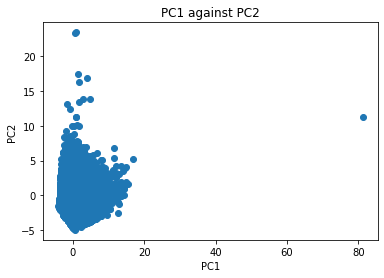

In [77]:
# 8 plot the principal components on 2D
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [78]:
# Explaining the Variance Using Principal Component
pca.explained_variance_ratio_

array([0.21290124, 0.16823063])